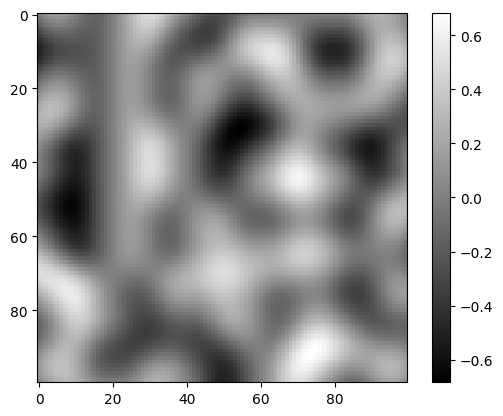

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def fade(t):
    """Fade function to smooth the interpolation."""
    return t * t * t * (t * (t * 6 - 15) + 10)

def lerp(t, a, b):
    """Linear interpolation."""
    return a + t * (b - a)

def gradient(h, x, y):
    """Gradient function. Returns dot product of the gradient vector and the distance vector."""
    vectors = np.array([[0,1], [0,-1], [1,0], [-1,0], [1,1], [-1,1], [1,-1], [-1,-1]])
    g = vectors[h % 8]
    return g[:, :, 0] * x + g[:, :, 1] * y

def perlin_noise(x, y, seed=0):
    """Generate Perlin noise for coordinates x, y."""
    np.random.seed(seed)
    p = np.arange(256, dtype=int)
    np.random.shuffle(p)
    p = np.stack([p, p]).flatten()
    
    xi = x.astype(int) & 255
    yi = y.astype(int) & 255
    
    xf = x - xi
    yf = y - yi
    
    u = fade(xf)
    v = fade(yf)
    
    n00 = gradient(p[p[xi] + yi], xf, yf)
    n01 = gradient(p[p[xi] + yi + 1], xf, yf - 1)
    n11 = gradient(p[p[xi + 1] + yi + 1], xf - 1, yf - 1)
    n10 = gradient(p[p[xi + 1] + yi], xf - 1, yf)
    
    x1 = lerp(u, n00, n10)
    x2 = lerp(u, n01, n11)
    
    return lerp(v, x1, x2)

# Generate a grid of coordinates
grid_size = 100
x = np.linspace(0, 5, grid_size, endpoint=False)
y = np.linspace(0, 5, grid_size, endpoint=False)
x, y = np.meshgrid(x, y)

# Compute Perlin noise
noise = perlin_noise(x, y, seed=0)

# Visualize the Perlin noise
plt.imshow(noise, cmap='gray')
plt.colorbar()
plt.show()

In [156]:
from noise import pnoise2

In [157]:
pnoise2(0.5, 0.5, 1)
Width = 100

In [158]:
pnoise2(0.5, 0.5, 1)

-0.125

In [65]:
noise = np.zeros((Width, Width))
for i in range(Width):
    for j in range(Width):
        noise[i][j] = pnoise2(i/Width, j/Width, 100,.8)

In [100]:
def add_nested_arrays(a,b):
    final = []
    for row_a,row_b in zip(a,b):
        final.append([x + y for x,y in zip(row_a,row_b)])
    return final

In [393]:
def contrast_split(array, sections = 2):
    min = np.min(array)
    max = np.max(array)

    for i in range(len(array)):
        for j in range(len(array)):
            array[i][j] = categorize_split(array[i][j], min, max, sections)

def categorize_split(value, min, max, sections = 2):

    for i in range(sections):
        if value < (min + (i+1)*(max-min)/sections):
            return i/sections
    
    return i/sections

810


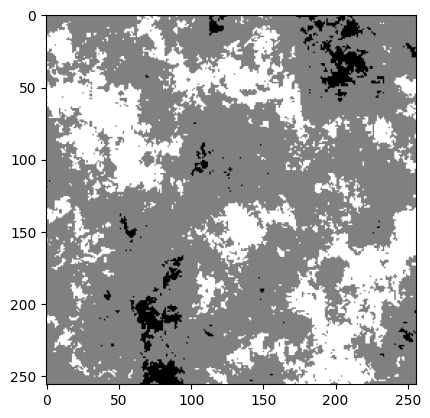

In [404]:
import matplotlib.pyplot as plt
from perlin_noise import PerlinNoise
import random

octaves = [25]
n = 256
seed = random.randint(0,100)
size = 1

real_seed = seed*10

final_pic = [[0 for i in range(n)] for j in range(n)]

for index, octave in enumerate(octaves):
    xpix, ypix = n, n
    
    for i in range(xpix):
        row = []
        for j in range(ypix):
            noise_val = pnoise2((i/xpix)*size+real_seed, (j/ypix)*size+real_seed, octave,.8)
            final_pic[i][j] += (1/(2**(index+1)))*noise_val
print(real_seed)
contrast_split(final_pic, 3)

plt.imshow(final_pic, cmap='gray')
plt.show()

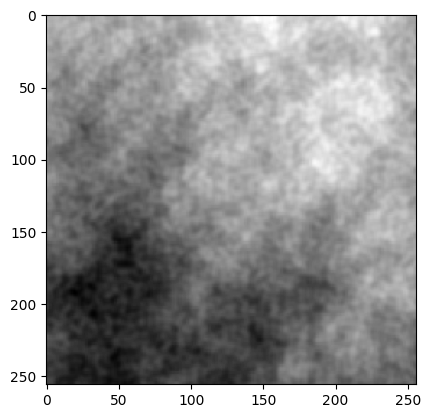

In [212]:
plt.imshow(final_pic, cmap='gray')

In [155]:
perlin_noise = [[pnoise2(x / 10.0, y / 10.0, 1.0) for y in range(Height)] for x in range(Width)]

TypeError: 'float' object cannot be interpreted as an integer